In [28]:
import numpy as np
from matplotlib import pyplot as plt

In [29]:
def sigmoid(x):
    return (1/(1+np.exp(-x)))

In [30]:
def initialize_parameter(input_size, hidden_size, output_size):
    W1 = np.random.randn(hidden_size, input_size)
    W2 = np.random.randn(output_size, hidden_size)
    b1 = np.zeros((hidden_size, 1))
    b2 = np.zeros((output_size, 1)) 
    parameters = {"W1" : W1, "b1": b1,
                  "W2" : W2, "b2": b2}
    return parameters

In [31]:
def forward_propogation(X,Y,parameters):
    m = X.shape[1]
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    Z1 = np.dot(W1,X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2)
    loss_function = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y))
    cost_function = -np.sum(loss_function)/m
    return cost_function, cache, A1,A2

In [32]:
def back_propogation(X,Y,cache):
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2) = cache
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis = 1, keepdims = True)
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, A1 * (1- A1))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis = 1, keepdims = True) / m
      
    gradients = {"dZ2": dZ2, "dW2": dW2, "db2": db2,
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    return gradients

In [33]:
def update_parameters(parameters, gradients, learningRate):
    parameters["W1"] = parameters["W1"] - learningRate * gradients["dW1"]
    parameters["W2"] = parameters["W2"] - learningRate * gradients["dW2"]
    parameters["b1"] = parameters["b1"] - learningRate * gradients["db1"]
    parameters["b2"] = parameters["b2"] - learningRate * gradients["db2"]
    return parameters

In [34]:
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]]) # OR input
Y = np.array([[0, 1, 1, 1]])

In [35]:
hidden_size = 2 # number of hidden layer neurons (2)
input_size = X.shape[0] # number of input features (2)
output_size = Y.shape[0] # number of output features (1)
parameters = initialize_parameter(input_size, hidden_size, output_size)
epoch = 100000
learningRate = 0.01
losses = np.zeros((epoch, 1))

In [36]:
for i in range(epoch):
    losses[i, 0], cache, A1, A2 = forward_propogation(X, Y, parameters)
    gradients = back_propogation(X, Y, cache)
    parameters = update_parameters(parameters, gradients, learningRate)

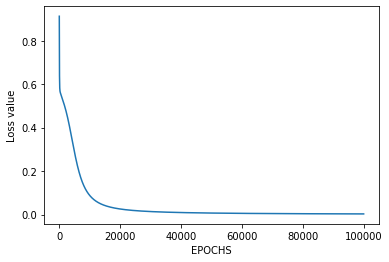

In [37]:
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()

In [44]:
X = np.array([[0, 0, 0, 0], [0, 1, 0, 1]]) # OR input
cost,val, A1,A2 = forward_propogation(X, Y, parameters)
prediction = (A2>0.5)*1
print("A1-->", A1)
print("A2 -->", A2)
print("prediction -->", prediction)

A1--> [[0.16834374 0.85453631 0.16834374 0.85453631]
 [0.89551336 0.08509009 0.89551336 0.08509009]]
A2 --> [[0.00574396 0.99733087 0.00574396 0.99733087]]
prediction --> [[0 1 0 1]]
